In [38]:
# Importing necessary libraries for the algorithms
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Bidirectional, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [39]:
#Loading the dataset from the csv file
data = pd.read_csv('bajaj-2003-2020.csv')

In [40]:
#Convert the Date column from string to datetime format for proper time-series handling.
data['Date'] = pd.to_datetime(data['Date'])


In [41]:
# Drop 'Symbol','No. of Trades' and 'Series' columns
data_cleaned = data.drop(columns=['Symbol', 'Series','No. of Trades'])

In [42]:
# Select the price columns to be normalized
price_columns = ['Prev Close', 'Open Price', 'High Price', 'Low Price', 'Last Price', 'Close Price', 'Average Price']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the price columns
data_cleaned[price_columns] = scaler.fit_transform(data_cleaned[price_columns])

In [43]:
# Determine the split index
split_index = int(len(data_cleaned) * 0.8)

# Split the data into training and test sets
train_data = data_cleaned[:split_index]
test_data = data_cleaned[split_index:]

In [44]:
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 30

# Create sequences for training data
X_train, y_train = create_sequences(train_data[price_columns].values, seq_length)

# Create sequences for test data
X_test, y_test = create_sequences(test_data[price_columns].values, seq_length)

In [45]:
# Reshape data for LSTM, Bidirectional LSTM, and GRU
X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2]))

print("X_train reshaped:", X_train_reshaped.shape)
print("X_test reshaped:", X_test_reshaped.shape)

X_train reshaped: (3480, 30, 7)
X_test reshaped: (848, 30, 7)


In [46]:
# LSTM Model
lstm_model = Sequential()
lstm_model.add(LSTM(50, return_sequences=True, input_shape=(seq_length, len(price_columns))))
lstm_model.add(LSTM(50))
lstm_model.add(Dense(len(price_columns)))
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# BiLSTM Model
bilstm_model = Sequential()
bilstm_model.add(Bidirectional(LSTM(50, return_sequences=True), input_shape=(seq_length, len(price_columns))))
bilstm_model.add(Bidirectional(LSTM(50)))
bilstm_model.add(Dense(len(price_columns)))
bilstm_model.compile(optimizer='adam', loss='mean_squared_error')

# GRU Model
gru_model = Sequential()
gru_model.add(GRU(50, return_sequences=True, input_shape=(seq_length, len(price_columns))))
gru_model.add(GRU(50))
gru_model.add(Dense(len(price_columns)))
gru_model.compile(optimizer='adam', loss='mean_squared_error')

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

d:\college\research paper\code\venv\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
d:\college\research paper\code\venv\lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [47]:
# Define the number of epochs and batch size
epochs = 100
batch_size = 64

# Train the LSTM model with dropout
history_lstm = lstm_model.fit(
    X_train_reshaped, y_train, 
    epochs=epochs, 
    batch_size=batch_size, 
    validation_data=(X_test_reshaped, y_test), 
    verbose=1
)


Epoch 1/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0135 - val_loss: 0.0016
Epoch 2/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0018 - val_loss: 6.0024e-04
Epoch 3/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0010 - val_loss: 2.7703e-04
Epoch 4/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 4.7078e-04 - val_loss: 1.6019e-04
Epoch 5/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 5.9283e-04 - val_loss: 1.9687e-04
Epoch 6/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 6.1055e-04 - val_loss: 3.7714e-04
Epoch 7/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 5.1387e-04 - val_loss: 1.6537e-04
Epoch 8/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 4.5383e-04 - val_loss: 3.0826e-04
Epoch 9/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 6.2450e-04 - val_loss: 5.1413e-04
Epoch 10/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 3.6432e-04 - val_loss: 1.5701e-04
Epoch 11/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 7.6017e-04 - v

In [48]:
# Train the BiLSTM model
history_bilstm = bilstm_model.fit(
    X_train_reshaped, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_test_reshaped, y_test),
    verbose=1
)



Epoch 1/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0083 - val_loss: 8.0002e-04
Epoch 2/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 8.2428e-04 - val_loss: 3.7938e-04
Epoch 3/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 5.9629e-04 - val_loss: 1.8822e-04
Epoch 4/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 6.7119e-04 - val_loss: 4.0128e-04
Epoch 5/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 4.3139e-04 - val_loss: 5.4301e-04
Epoch 6/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 8.2389e-04 - val_loss: 1.7138e-04
Epoch 7/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 4.9043e-04 - val_loss: 4.5816e-04
Epoch 8/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 3.5782e-04 - val_loss: 4.8471e-04
Epoch 9/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 7.9824e-04 - val_loss: 1.4700e-04
Epoch 10/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 6.2654e-04 - val_loss: 3.1319e-04
Epoch 11/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 3.

In [49]:
# Train the GRU model
history_gru = gru_model.fit(
    X_train_reshaped, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_test_reshaped, y_test),
    verbose=1
)

Epoch 1/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0160 - val_loss: 3.1191e-04
Epoch 2/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 2.0188e-04 - val_loss: 1.2010e-04
Epoch 3/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 8.2547e-04 - val_loss: 8.2773e-05
Epoch 4/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 4.6103e-04 - val_loss: 1.1230e-04
Epoch 5/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 7.8486e-04 - val_loss: 8.7794e-05
Epoch 6/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 4.9468e-04 - val_loss: 1.4735e-04
Epoch 7/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.2688e-04 - val_loss: 1.0102e-04
Epoch 8/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 9.6772e-04 - val_loss: 7.8426e-05
Epoch 9/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 3.3012e-04 - val_loss: 9.3160e-05
Epoch 10/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.5681e-04 - val_loss: 6.7454e-05
Epoch 11/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 3.

In [50]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# Predict on the test set
y_pred_lstm = lstm_model.predict(X_test_reshaped)
y_pred_bilstm = bilstm_model.predict(X_test_reshaped)
y_pred_gru = gru_model.predict(X_test_reshaped)

# Calculate MSE and MAPE for LSTM model
mse_lstm = mean_squared_error(y_test, y_pred_lstm)
mape_lstm = mean_absolute_percentage_error(y_test, y_pred_lstm)
rmse_lstm = np.sqrt(mse_lstm)

# Calculate MSE and MAPE for BiLSTM model
mse_bilstm = mean_squared_error(y_test, y_pred_bilstm)
mape_bilstm = mean_absolute_percentage_error(y_test, y_pred_bilstm)
rmse_bilstm = np.sqrt(mse_bilstm)

# Calculate MSE and MAPE for GRU model
mse_gru = mean_squared_error(y_test, y_pred_gru)
mape_gru = mean_absolute_percentage_error(y_test, y_pred_gru)
rmse_gru = np.sqrt(mse_gru)

print(f"LSTM Model - MSE: {mse_lstm}, MAPE: {mape_lstm}, RMSE: {rmse_lstm}")
print(f"BiLSTM Model - MSE: {mse_bilstm}, MAPE: {mape_bilstm}, RMSE: {rmse_bilstm}")
print(f"GRU Model - MSE: {mse_gru}, MAPE: {mape_gru}, RMSE: {rmse_gru}")

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
LSTM Model - MSE: 0.0001784642077492683, MAPE: 0.05016990360718087, RMSE: 0.013359049657414569
BiLSTM Model - MSE: 7.134551636016977e-05, MAPE: 0.02331327448797511, RMSE: 0.00844662751399455
GRU Model - MSE: 0.00010867825795055204, MAPE: 0.03513080697095547, RMSE: 0.010424886471830378


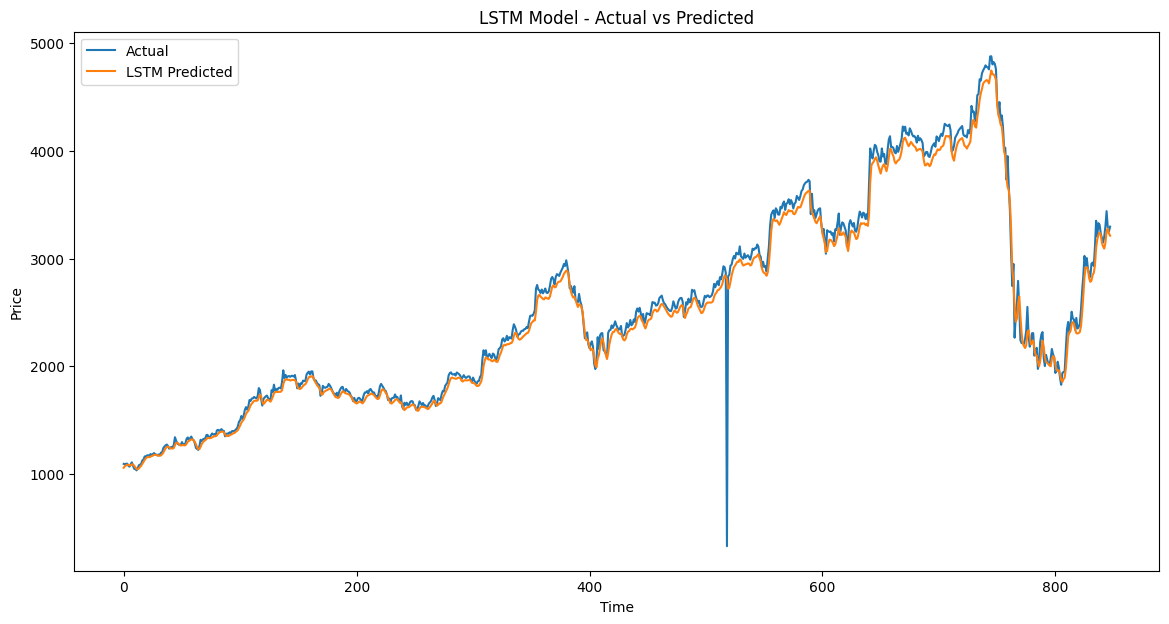

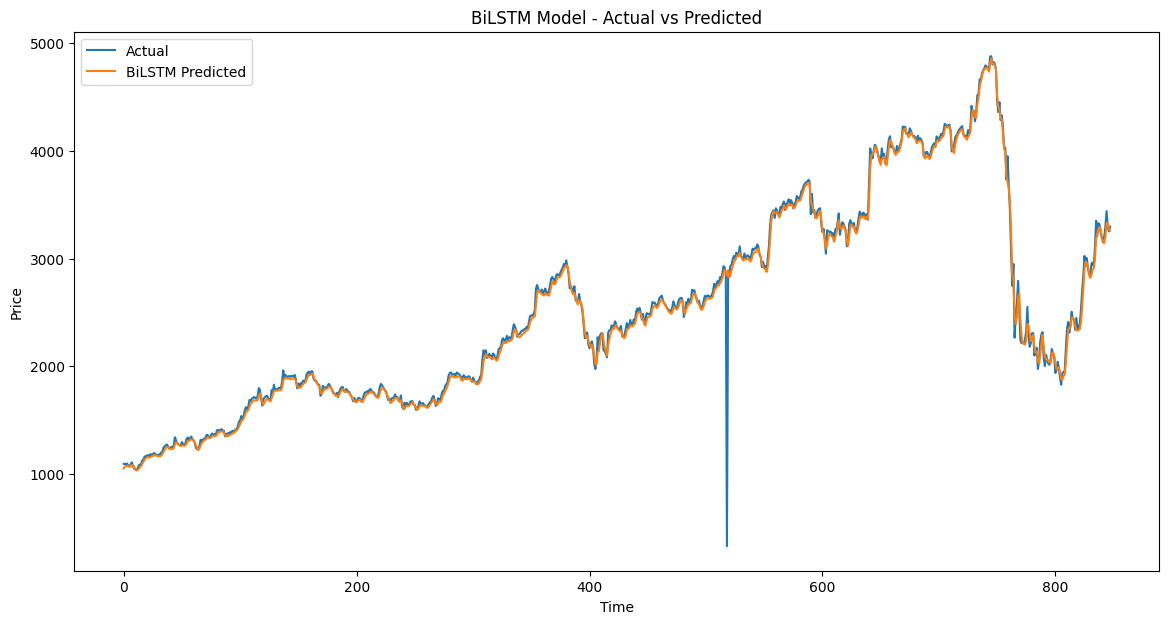

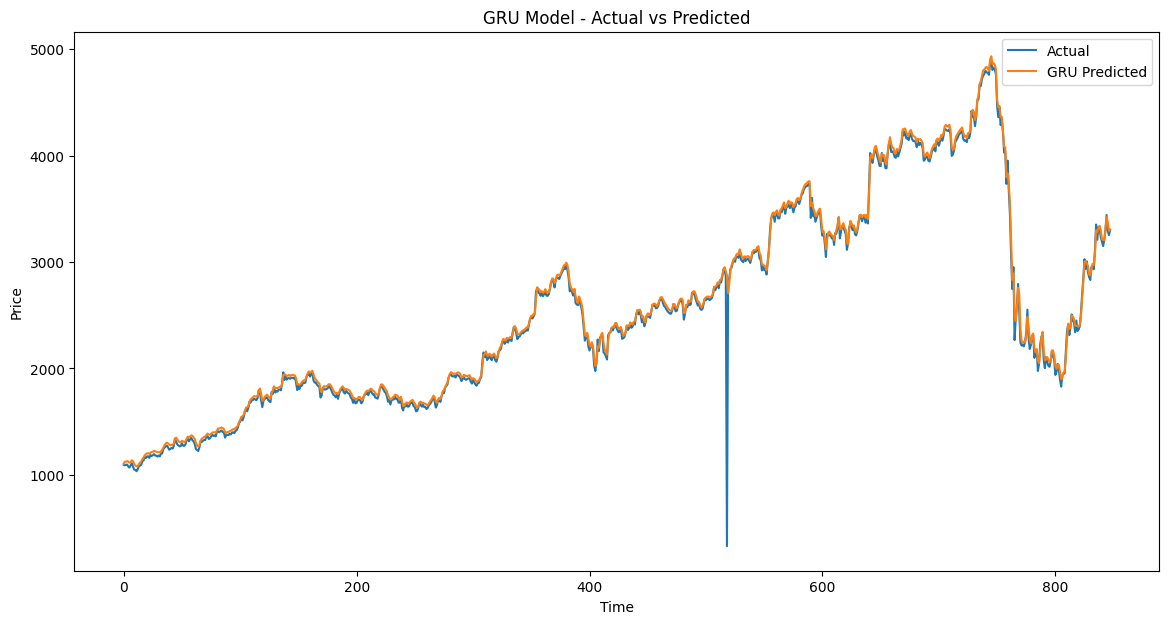

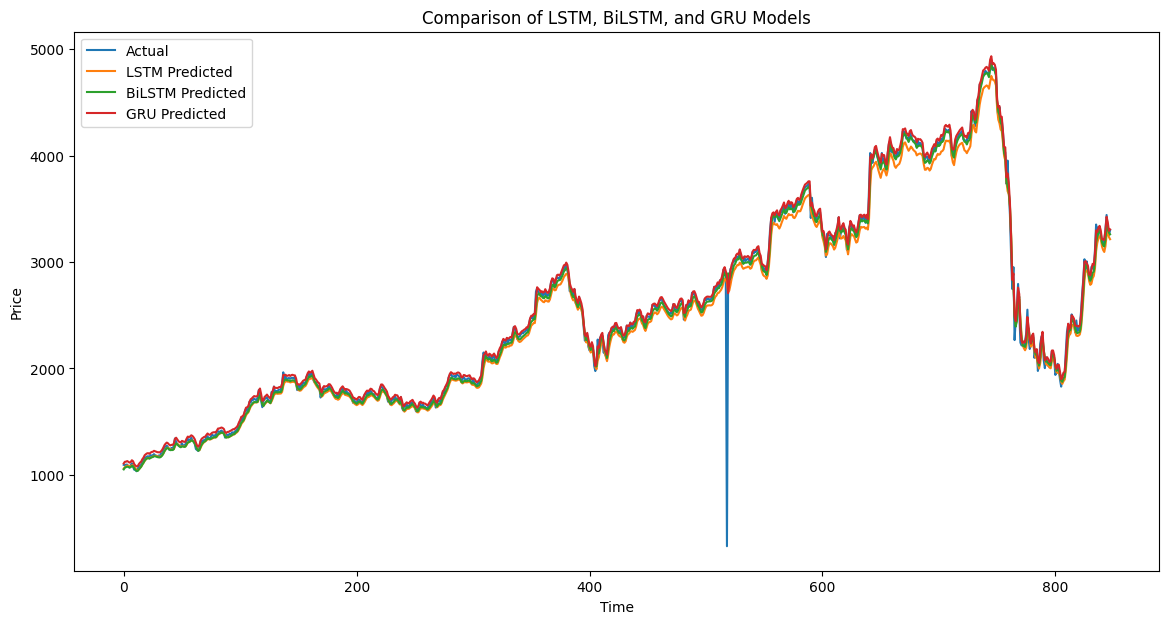

In [51]:
#inverse transform the predicted values
y_test_inv = scaler.inverse_transform(y_test)
y_pred_lstm_inv = scaler.inverse_transform(y_pred_lstm)
y_pred_bilstm_inv = scaler.inverse_transform(y_pred_bilstm)
y_pred_gru_inv = scaler.inverse_transform(y_pred_gru)



# Plot the actual vs predicted values for LSTM model
plt.figure(figsize=(14, 7))
plt.plot(y_test_inv[:, 0], label='Actual')
plt.plot(y_pred_lstm_inv[:, 0], label='LSTM Predicted')
plt.title('LSTM Model - Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

# Plot the actual vs predicted values for BiLSTM model
plt.figure(figsize=(14, 7))
plt.plot(y_test_inv[:, 0], label='Actual')
plt.plot(y_pred_bilstm_inv[:, 0], label='BiLSTM Predicted')
plt.title('BiLSTM Model - Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

# Plot the actual vs predicted values for GRU model
plt.figure(figsize=(14, 7))
plt.plot(y_test_inv[:, 0], label='Actual')
plt.plot(y_pred_gru_inv[:, 0], label='GRU Predicted')
plt.title('GRU Model - Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

#comparison of the three models
plt.figure(figsize=(14, 7))
plt.plot(y_test_inv[:, 0], label='Actual')
plt.plot(y_pred_lstm_inv[:, 0], label='LSTM Predicted')
plt.plot(y_pred_bilstm_inv[:, 0], label='BiLSTM Predicted')
plt.plot(y_pred_gru_inv[:, 0], label='GRU Predicted')
plt.title('Comparison of LSTM, BiLSTM, and GRU Models')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()


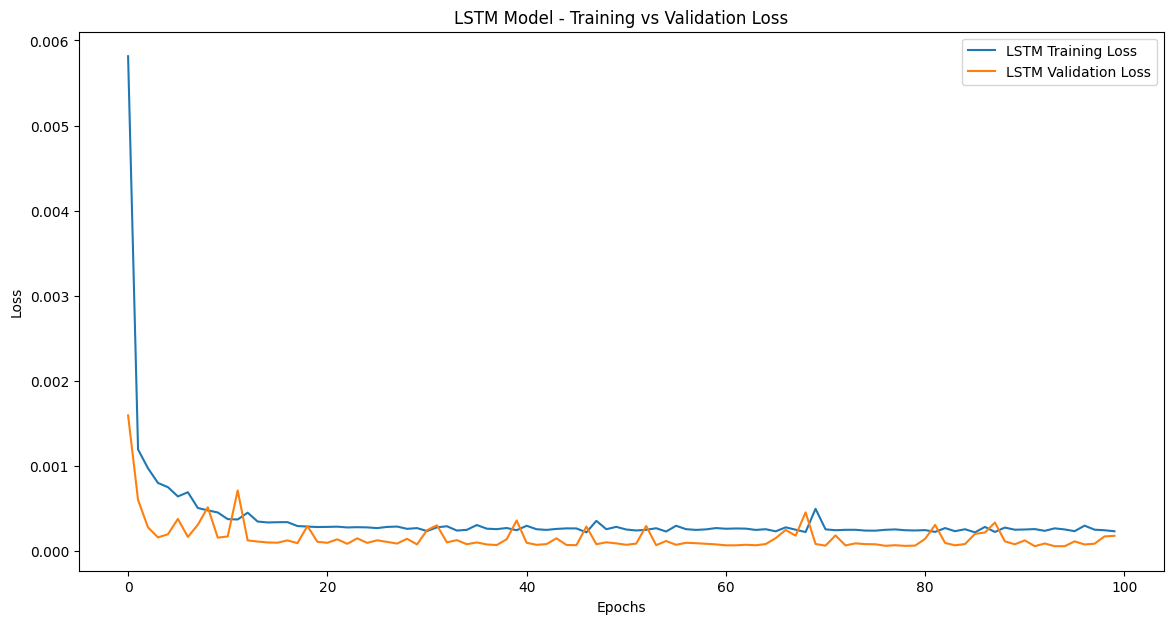

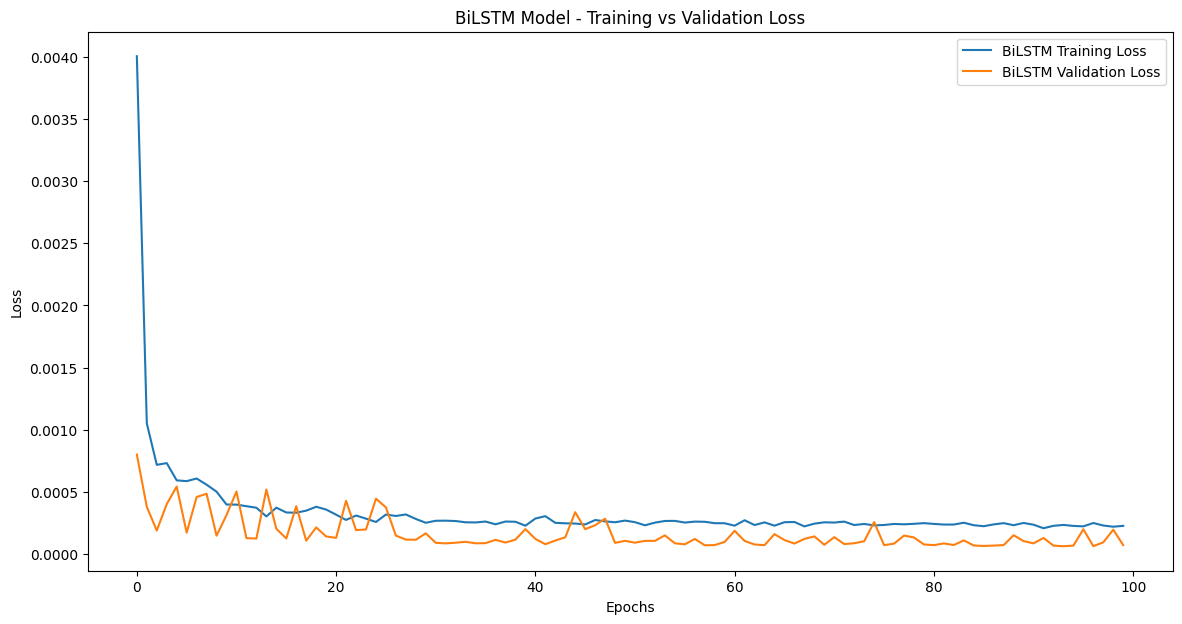

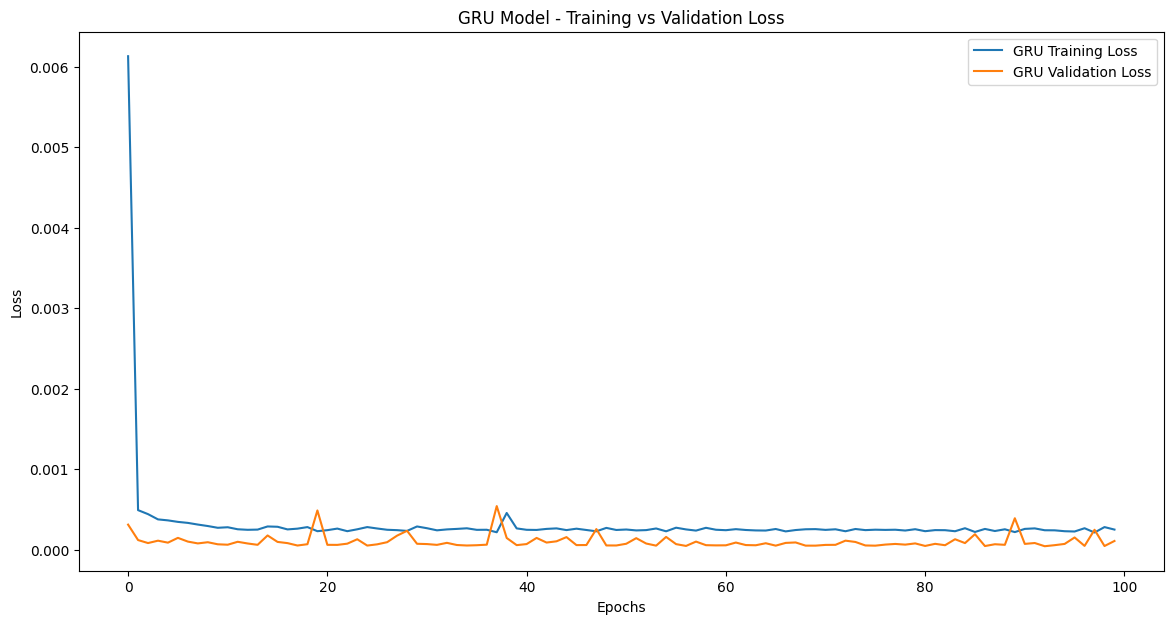

In [52]:
# Plot training vs validation loss for LSTM model
plt.figure(figsize=(14, 7))
plt.plot(history_lstm.history['loss'], label='LSTM Training Loss')
plt.plot(history_lstm.history['val_loss'], label='LSTM Validation Loss')
plt.title('LSTM Model - Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training vs validation loss for BiLSTM model
plt.figure(figsize=(14, 7))
plt.plot(history_bilstm.history['loss'], label='BiLSTM Training Loss')
plt.plot(history_bilstm.history['val_loss'], label='BiLSTM Validation Loss')
plt.title('BiLSTM Model - Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training vs validation loss for GRU model
plt.figure(figsize=(14, 7))
plt.plot(history_gru.history['loss'], label='GRU Training Loss')
plt.plot(history_gru.history['val_loss'], label='GRU Validation Loss')
plt.title('GRU Model - Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

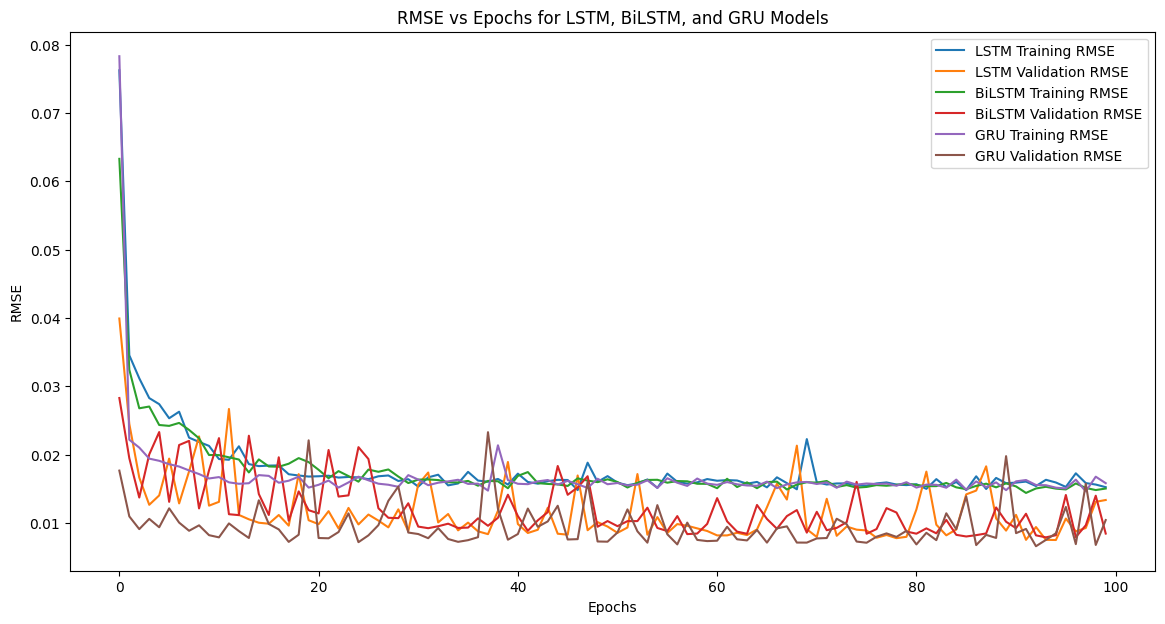

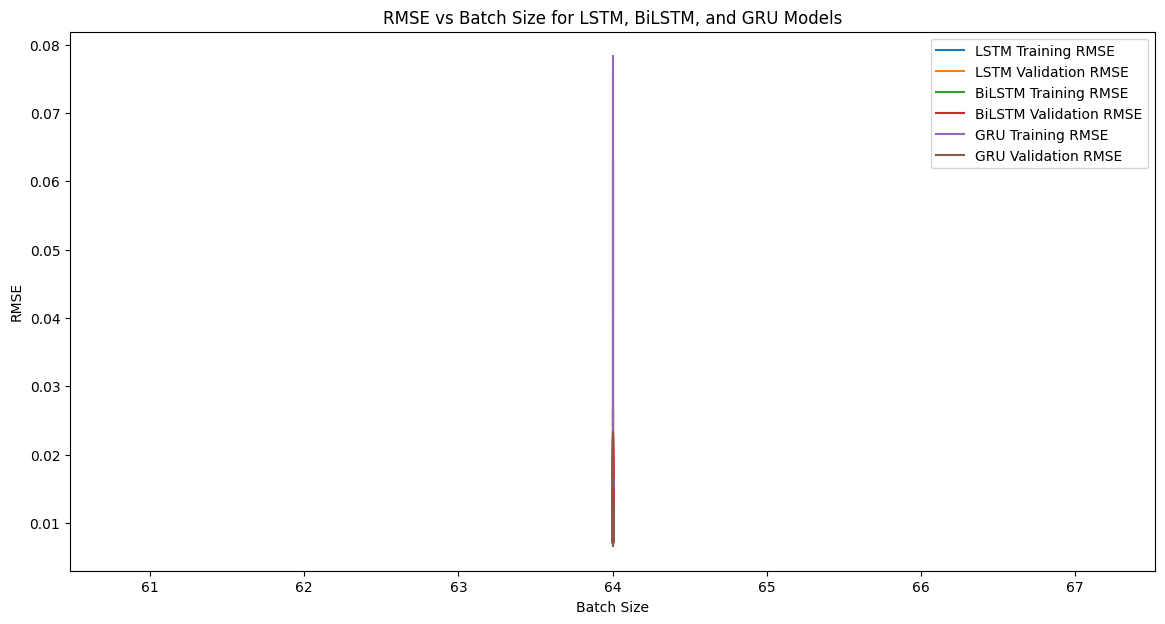

In [53]:
# Extract RMSE values from the training history
rmse_lstm_train = np.sqrt(history_lstm.history['loss'])
rmse_lstm_val = np.sqrt(history_lstm.history['val_loss'])

rmse_bilstm_train = np.sqrt(history_bilstm.history['loss'])
rmse_bilstm_val = np.sqrt(history_bilstm.history['val_loss'])

rmse_gru_train = np.sqrt(history_gru.history['loss'])
rmse_gru_val = np.sqrt(history_gru.history['val_loss'])

# Plot RMSE against epochs for each model
plt.figure(figsize=(14, 7))
plt.plot(rmse_lstm_train, label='LSTM Training RMSE')
plt.plot(rmse_lstm_val, label='LSTM Validation RMSE')
plt.plot(rmse_bilstm_train, label='BiLSTM Training RMSE')
plt.plot(rmse_bilstm_val, label='BiLSTM Validation RMSE')
plt.plot(rmse_gru_train, label='GRU Training RMSE')
plt.plot(rmse_gru_val, label='GRU Validation RMSE')
plt.title('RMSE vs Epochs for LSTM, BiLSTM, and GRU Models')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
plt.show()

# Plot RMSE against batch size for each model
batch_sizes = [batch_size] * epochs

plt.figure(figsize=(14, 7))
plt.plot(batch_sizes, rmse_lstm_train, label='LSTM Training RMSE')
plt.plot(batch_sizes, rmse_lstm_val, label='LSTM Validation RMSE')
plt.plot(batch_sizes, rmse_bilstm_train, label='BiLSTM Training RMSE')
plt.plot(batch_sizes, rmse_bilstm_val, label='BiLSTM Validation RMSE')
plt.plot(batch_sizes, rmse_gru_train, label='GRU Training RMSE')
plt.plot(batch_sizes, rmse_gru_val, label='GRU Validation RMSE')
plt.title('RMSE vs Batch Size for LSTM, BiLSTM, and GRU Models')
plt.xlabel('Batch Size')
plt.ylabel('RMSE')
plt.legend()
plt.show()